In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], inplace=True, axis=1)

In [7]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [8]:
numerical_features = ['num_reactions', 'num_comments', 'num_shares',
                      'num_likes', 'num_loves', 'num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(df[numerical_features])

In [14]:
X

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [15]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
wcss

[63449.999999999796,
 48278.09824220545,
 38373.20094785015,
 32470.249685212868,
 28750.61394194682,
 25310.34355606722,
 22272.736283307557,
 19315.227388218707,
 17578.30845188484,
 16266.718916310421]

<ipython-input-20-98e4e6c6d954>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(list(range(1,11)), wcss, 'bo-', markersize=8, marker='o')


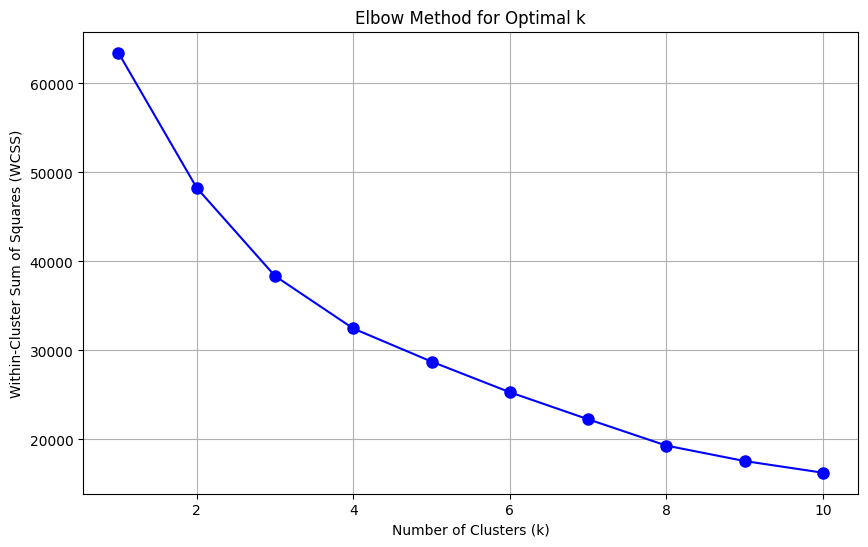

In [20]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(list(range(1,11)), wcss, 'bo-', markersize=8, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [34]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

df.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,-0.028356,-0.245461,-0.304144,-0.008996,-0.193361,-0.033187,-0.176010,-0.152587,-0.155748,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,0.589899,0.438012,0.243007,0.451577,1.432855,0.999037,0.329436,-0.152587,3.972160,2
7,246675545449582_1644824665634656,video,4/17/2018 7:42,0.140259,0.257026,0.098620,0.100029,0.482144,-0.033187,0.076713,-0.152587,1.220221,0
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,-0.058620,-0.251082,-0.304144,-0.037921,-0.193361,-0.147879,-0.176010,-0.152587,-0.155748,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,-0.129957,-0.242089,-0.296545,-0.106895,-0.243398,-0.147879,-0.176010,-0.152587,-0.155748,0


In [27]:
kmeans.cluster_centers_

array([[-0.26013779, -0.16896953, -0.17835882, -0.24969073, -0.16842604,
        -0.08796983, -0.10354971, -0.08241419, -0.10412721],
       [ 3.44405643, -0.18325934, -0.21564903,  3.56552625, -0.24077535,
         0.13145062, -0.12573702, -0.13238837, -0.14835034],
       [ 0.66662331,  2.81444887,  2.66829165,  0.45158262,  2.37303151,
         0.28855284,  1.18869387,  1.3353606 ,  1.65111707],
       [ 2.79403685,  1.67961793,  5.39736106,  1.94369348,  7.14227048,
        11.54392086,  7.16782069,  1.70746866,  2.35337266]])

In [28]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
df['Cluster'].value_counts()

Cluster
0    6264
2     380
1     372
3      34
Name: count, dtype: int64